# Modelo Regresion Lineal

## Lecturas previas
- https://youtu.be/kqS1iprWCNg
- https://youtu.be/k964_uNn3l0
- https://youtu.be/SZyH6YkQqIk

Ideas matematicas
- https://youtu.be/8wpUCagUfwc
- 
- https://es.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/regression-library/a/introduction-to-residuals
- https://es.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data  (path map)

Aproxamacion minimos cuadrados
- https://es.khanacademy.org/math/linear-algebra/alternate-bases/orthogonal-projections/v/linear-algebra-least-squares-approximation


- https://es.khanacademy.org/math/ap-statistics/bivariate-data-ap/least-squares-regression/v/regression-residual-intro

- https://es.khanacademy.org/math/ap-statistics/bivariate-data-ap/assessing-fit-least-squares-regression/v/residual-plots


In [1]:
import matplotlib.pyplot as plt
import numpy as np

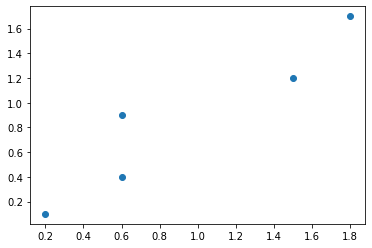

In [2]:
# Escribiremos unos datos ficticios para el ejemplo
x = np.array([0.2,0.6,0.6,1.5,1.8])
y = np.array([0.1,0.4,0.9,1.2,1.7])
plt.scatter(x, y)

Vemos si hay una dependencia lineal

In [4]:
X_train, y_train = np.array([0.6, 1.8]), np.array([0.4, 1.7])
X_test, y_test = np.array([0.2, 0.6, 1.5]), np.array([0.1, 0.9, 1.2])

In [64]:
from sklearn.linear_model import LinearRegression

# reshape ese igual resize, cambiamos la dimension
# Es los mismos datos , solo ahora es (2,1)
X_train.resize(len(X_train), 1)
X_train.resize(len(y_train), 1)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [66]:
coefs = modelo.coef_[0]
intercept = modelo.intercept_
print("y = {:.4f} + {:.4f}x".format(intercept, coefs))

y = -0.2500 + 1.0833x


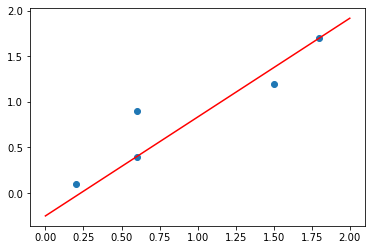

In [15]:
xx = np.linspace(0.0, 2, 2)
yy = modelo.predict(xx.reshape(len(xx), 1)) # Es necesario agregar un 1 

plt.scatter(x, y)
plt.plot(xx, yy, c='r')

In [14]:
from sklearn.metrics import mean_squared_error as mse
msel = mse(y_test, modelo.predict(X_test.reshape(len(X_test), 1)))
msel

0.09946759259259248

Esta sobreajustado con esos  dos puntos

** Regularizacion** 

Ridge

Establece una penalizacion, cada vez que encuentra un erro al hacer las pruebas le da una penalizacion para encontrar una mejor solucion.

In [17]:
from sklearn.linear_model import Ridge
modelo2 = Ridge(alpha=0.3)
modelo2.fit(X_train, y_train)

# Monstrar el modelo
coefs = modelo2.coef_[0]


In [23]:
intercept = modelo2.intercept_[0]
print("y = (:4.f) + (:.4f)x".format(intercept, coefs[0]))

IndexError: invalid index to scalar variable.

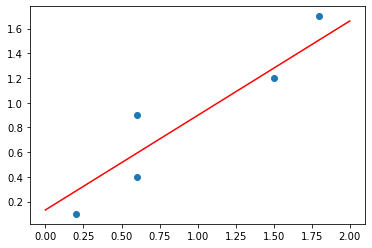

In [13]:
xx = np.linspace(0.0, 2, 2)
yy = modelo2.predict(xx.reshape(len(xx), 1)) # Es necesario agregar un 1 

plt.scatter(x, y)
plt.plot(xx, yy, c='r')

Evita el sobre ajuste con las datos